# Лабораторная Работа №3
Шеввченко М.А.  
группа ИУ3-42М  
Вариант №12  

In [1]:
import os

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

In [2]:
DATA_PATH = os.path.join('data', 'Lab3', 'data.xlsx')

In [3]:
df = pd.read_excel(DATA_PATH)
points1 = df['a1']
points2 = df['a2']

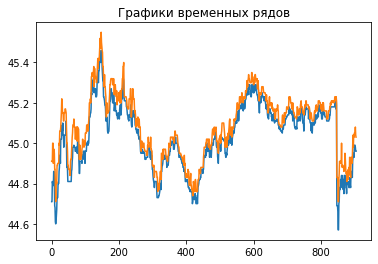

In [4]:
ax = plt.subplot()
ax.plot(points1)
ax.plot(points2)
ax.set_title('Графики временных рядов')
plt.show()

## Поиск стационарности

### Ряд 'a1'

In [6]:
results1 = adfuller(
    points1,
    regression='c',
    regresults=True,
)
results1[3].__dict__['resols'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     4.342
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           0.000655
Time:                        00:44:08   Log-Likelihood:                 1865.7
No. Observations:                 900   AIC:                            -3719.
Df Residuals:                     894   BIC:                            -3690.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0213      0.006     -3.347      0.001      -0.034      -0.009
x2            -0.0085      0.033     -0.256      0.798      -0.074       0.057
x3            -0.0130      0.033     -0.392      0.695      -0.078       0.052
x4             0.0789      0.033      2.392      0.017       0.014       0.144
x5             0.0856      0.033      2.588      0.010       0.021       0.151
const          0.9604      0.287      3.348      0.001       0.397       1.523
==============================================================================
Omnibus:                      969.886   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           222681.209
Skew:                          -4.619   Prob(JB):                         0.00
Kurtosis:                      79.504   Cond. No.                     1.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
display(results1)

(-3.34732419653885,
 0.012891138920083669,
 {'1%': -3.43763672130727,
  '5%': -2.864756726529493,
  '10%': -2.568482801234568},
 <statsmodels.stats.diagnostic.ResultsStore at 0x2247005ca30>)

### Ряд 'a2'

In [9]:
results2 = adfuller(
    points2,
    regression='c',
    regresults=True,
)
results2[3].__dict__['resols'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.761
Date:                Sat, 23 Apr 2022   Prob (F-statistic):            0.00224
Time:                        00:44:08   Log-Likelihood:                 1845.2
No. Observations:                 900   AIC:                            -3678.
Df Residuals:                     894   BIC:                            -3650.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0206      0.007     -3.065      0.002      -0.034      -0.007
x2            -0.0505      0.033     -1.514      0.130      -0.116       0.015
x3            -0.0209      0.033     -0.628      0.530      -0.086       0.044
x4             0.0376      0.033      1.131      0.258      -0.028       0.103
x5             0.0806      0.033      2.427      0.015       0.015       0.146
const          0.9279      0.303      3.065      0.002       0.334       1.522
==============================================================================
Omnibus:                      537.957   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23737.019
Skew:                          -2.052   Prob(JB):                         0.00
Kurtosis:                      27.822   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
display(results2)

(-3.0652946515388777,
 0.02923044246822934,
 {'1%': -3.43763672130727,
  '5%': -2.864756726529493,
  '10%': -2.568482801234568},
 <statsmodels.stats.diagnostic.ResultsStore at 0x2247a32fd00>)

## VAR модель

In [11]:
model = VAR(df)
model.select_order(10, trend="c").summary()

,AIC,BIC,FPE,HQIC
0,-10.52,-10.51,2.688e-05,-10.52
1,-14.63,-14.60,4.419e-07,-14.62
2,-14.68,-14.63,4.197e-07,-14.66
3,-14.70,-14.63,4.110e-07,-14.68
4,-14.73,-14.63*,4.009e-07,-14.69*
5,-14.73,-14.61,4.007e-07,-14.69
6,-14.73,-14.59,3.995e-07,-14.68
7,-14.74,-14.58,3.976e-07*,-14.68
8,-14.74*,-14.56,3.976e-07,-14.67
9,-14.73,-14.53,3.997e-07,-14.65


In [12]:
results = model.fit(
    round(len(df['a1']) ** 0.25),
    ic='aic',
    trend='c',
)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 23, Apr, 2022
Time:                     00:44:08
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -14.5765
Nobs:                     900.000    HQIC:                  -14.6491
Log likelihood:           4080.18    FPE:                4.15443e-07
AIC:                     -14.6939    Det(Omega_mle):     4.05471e-07
--------------------------------------------------------------------
Results for equation a1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.755616         0.292199            2.586           0.010
L1.a1         0.768434         0.048169           15.953           0.000
L1.a2         0.255629         0.047354            5.398           0.000
L2.a1        -0.002203

## Оценка реакции на импульс

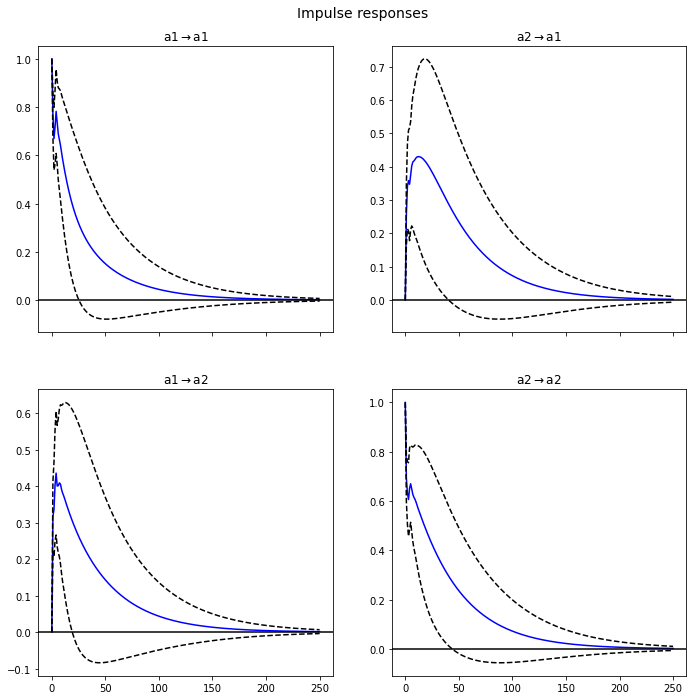

In [13]:
irf = results.irf(250)
_ = irf.plot()

## Кумулятивные эффекты

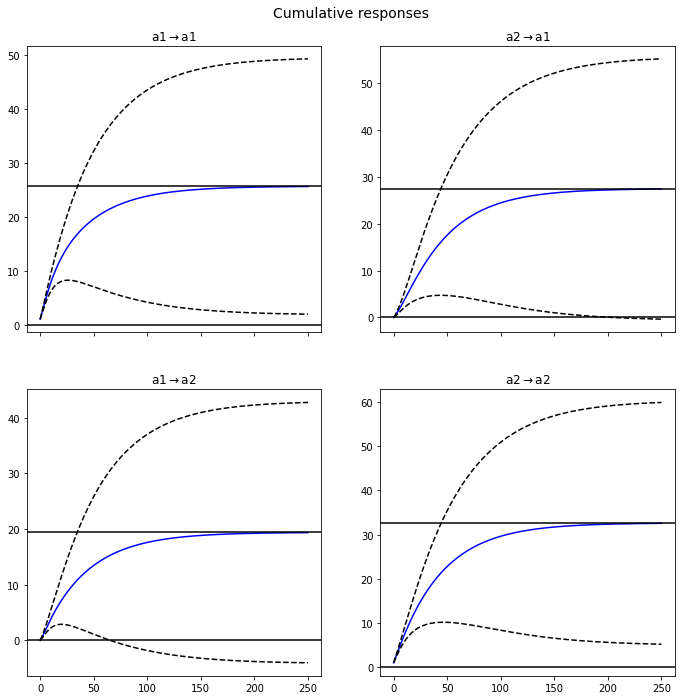

In [14]:
_ = irf.plot_cum_effects(orth=False)

Накопленные отклики не сходятся к 0, так как ряд стационарный.

## Декомпозиция дисперсии

In [15]:
fevd = results.fevd(10)
fevd.summary()

FEVD for a1
           a1        a2
0    1.000000  0.000000
1    0.983278  0.016722
2    0.968232  0.031768
3    0.960129  0.039871
4    0.957167  0.042833
5    0.953408  0.046592
6    0.948981  0.051019
7    0.944945  0.055055
8    0.941418  0.058582
9    0.938115  0.061885

FEVD for a2
           a1        a2
0    0.517886  0.482114
1    0.622130  0.377870
2    0.664170  0.335830
3    0.696509  0.303491
4    0.718828  0.281172
5    0.729692  0.270308
6    0.737800  0.262200
7    0.744696  0.255304
8    0.750142  0.249858
9    0.754045  0.245955




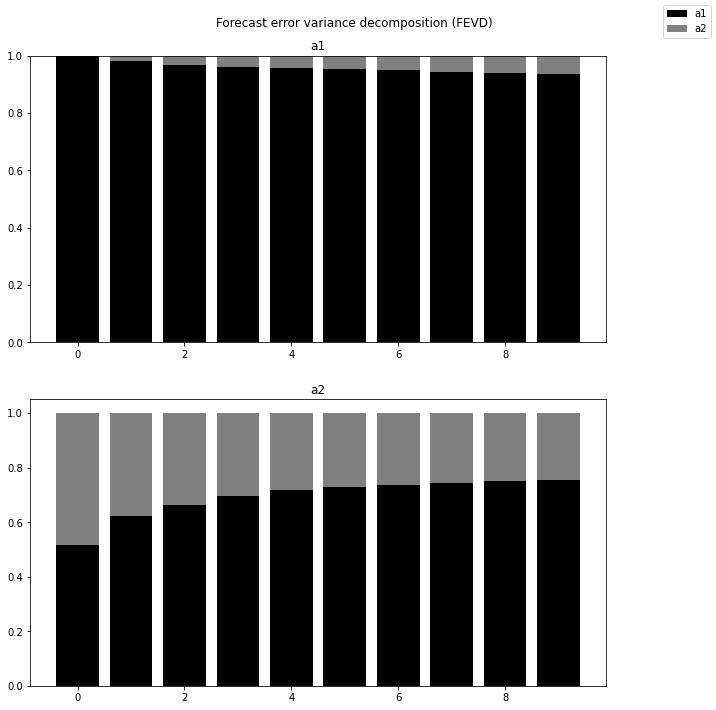

In [16]:
_ = results.fevd(10).plot()

Можем сделать вывод, что а1 влияет на ошибки а2 более значительно, чем a2 на a1.

## Тестирование причинности по Грейнджеру

Нулевая гипотеза: прошлые значения a1 не имеют статистически значимого эффекта на текущие значения a2.

In [17]:
MAX_LAG = 3

x1 = pd.concat([points1, points2], axis=1)
test1 = grangercausalitytests(x1, MAX_LAG, verbose=False)
print(f'a1 -> a2: {test1[3][0]["ssr_chi2test"][1]}')

x2 = pd.concat([points2, points1], axis=1)
test2 = grangercausalitytests(x2, MAX_LAG, verbose=False)
print(f'a2 -> a1: {test2[3][0]["ssr_chi2test"][1]}')

a1 -> a2: 2.525584856310605e-07
a2 -> a1: 4.469456420513747e-09


## Проверка остатков тестом Льюнга-Бокса

Нулевая гипотеза: автокорреляция остатков отсутствует.

In [18]:
test1 = acorr_ljungbox(results.resid['a1'], lags=[MAX_LAG])
test1

,lb_stat,lb_pvalue
3,0.060426,0.99612


In [19]:
test2 = acorr_ljungbox(results.resid['a2'], lags=[MAX_LAG])
test2

,lb_stat,lb_pvalue
3,0.038254,0.998033


Так как __p-value > 0.05__, мы не можем отвергнуть нулевую гипотезу о независимости остатков, т.е. остатки – независимы.